# First Order Linear Difference Equations

## The Homogeneous Equation

They describe how a variable evolves over time (laws of motion). They are widely used in economics, finance, biology, and many other fields
because in a lot of application it is easier to think about how a variable changes from one period to the next rather than thinking about its absolute value.
The example of the bank account that we studied in the previous chapter is a simple example of a first order linear difference equation.
We saw last quite easy to describe the value of the bank account in a given month as a function of the value of the bank account in the previous month plus interest (assuming no deposits or withdrawals):

$$
x_{t} = (1 + 0.02) x_{t - 1}
$$

However it required more work to express the value of the bank account in month $t$ as
a function of the initial value of the bank account ($x_0$) and the time index $t$ (in other words to solve the equation):

$$
x_t = (1.02)^t x_0 
$$

In order to study how this systems described by an equation of this form move over time it helps to generalize the equation a bit. We will replace the specific number $1.02$ with a more general parameter $\phi$  and see what happens
for different values of $\phi$. Basically we will repeat the analysis that we did last time but with a few different values of $\phi$.

$$
x_t = \phi^{t} x_{0}
$$

In [20]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(100)
x_0 = 10
phi = [0.8, 0.9, 0.95, 1.0, 1.005, 1.01, 1.02]

x = np.zeros((len(phi), len(t)))

for i in range(len(phi)):
    x[i, :] = x_0 * phi[i]**t

x


array([[1.00000000e+01, 8.00000000e+00, 6.40000000e+00, 5.12000000e+00,
        4.09600000e+00, 3.27680000e+00, 2.62144000e+00, 2.09715200e+00,
        1.67772160e+00, 1.34217728e+00, 1.07374182e+00, 8.58993459e-01,
        6.87194767e-01, 5.49755814e-01, 4.39804651e-01, 3.51843721e-01,
        2.81474977e-01, 2.25179981e-01, 1.80143985e-01, 1.44115188e-01,
        1.15292150e-01, 9.22337204e-02, 7.37869763e-02, 5.90295810e-02,
        4.72236648e-02, 3.77789319e-02, 3.02231455e-02, 2.41785164e-02,
        1.93428131e-02, 1.54742505e-02, 1.23794004e-02, 9.90352031e-03,
        7.92281625e-03, 6.33825300e-03, 5.07060240e-03, 4.05648192e-03,
        3.24518554e-03, 2.59614843e-03, 2.07691874e-03, 1.66153499e-03,
        1.32922800e-03, 1.06338240e-03, 8.50705917e-04, 6.80564734e-04,
        5.44451787e-04, 4.35561430e-04, 3.48449144e-04, 2.78759315e-04,
        2.23007452e-04, 1.78405962e-04, 1.42724769e-04, 1.14179815e-04,
        9.13438523e-05, 7.30750819e-05, 5.84600655e-05, 4.676805

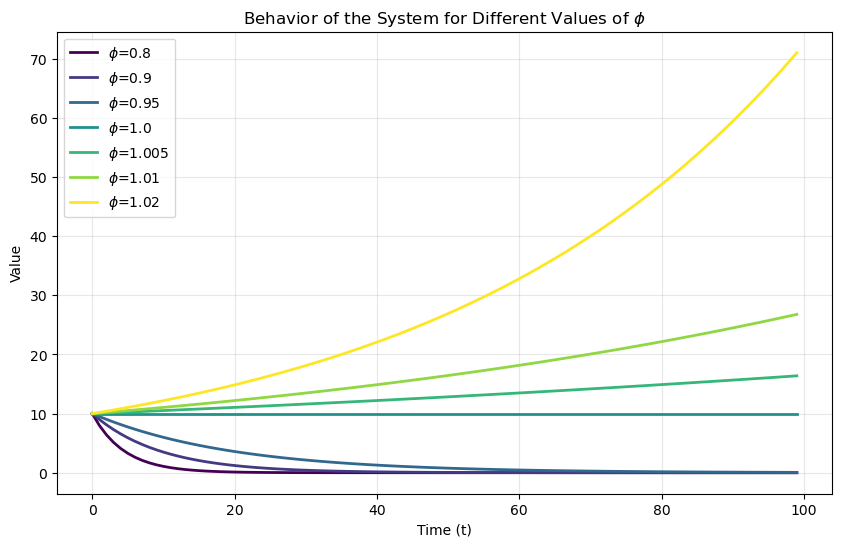

In [ ]:
#| label: fig-diff-eq-homogeneous-behavior
#| fig-cap: "Behavior of the homogeneous system for different values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi)))

for i in range(len(phi)):
    plt.plot(t, x[i], label=fr"$\phi$={phi[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior of the System for Different Values of $\phi$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

From @fig-diff-eq-homogeneous-behavior you can see that $\phi = 1$ is kind of a special boundary case. It corresponds to a situation where you neither earn nor pay interest on your bank account. Assuming there are no deposits or withdrawals or service fees,
the value of your bank account will not change over time (it will stay the same as the initial value $x_0$).

However, if $\phi$ is even slightly larger than 1 (for example $\phi = 1.01$) then the value of your bank account will grow over time without bound (it will go to infinity as $t$ goes to infinity).
Mathematically you say that the sequence of amounts over time ($x_1, x_2, \ldots, x_t$) diverges (has no limit).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = +\infty \quad \text{for any } \phi > 1, x_0 > 0
$$

For values less of $\phi$ that are smaller than 1 (for example $\phi = 0.98$) (meaning you pay interest on your bank account, this can actually happen in some countries with negative interest rates and means that you pay the bank for holding your money)
the value of your bank account will diminish over time and eventually go to zero (it will converge to zero as $t$ goes to infinity).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = 0 \quad \text{for any } 0 < \phi < 1
$$

The next case is when $\phi$ is negative. This does not make much sense in the context of a bank account but it can be useful in other contexts.

For example if $\phi = -1.01$ then the value of your bank account will oscillate between positive and negative values and diverge (it will go to plus or minus infinity as $t$ goes to infinity).


In [35]:
phi_neg = [-0.95, -1.0, -1.01]

t_neg = np.arange(30)
x_neg = np.zeros((len(phi_neg), len(t_neg)))

for i in range(len(phi_neg)):
    x_neg[i, :] = x_0 * phi_neg[i]**t_neg

x_neg

array([[ 10.        ,  -9.5       ,   9.025     ,  -8.57375   ,
          8.1450625 ,  -7.73780937,   7.35091891,  -6.98337296,
          6.63420431,  -6.3024941 ,   5.98736939,  -5.68800092,
          5.40360088,  -5.13342083,   4.87674979,  -4.6329123 ,
          4.40126669,  -4.18120335,   3.97214318,  -3.77353603,
          3.58485922,  -3.40561626,   3.23533545,  -3.07356868,
          2.91989024,  -2.77389573,   2.63520094,  -2.5034409 ,
          2.37826885,  -2.25935541],
       [ 10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ,  10.        , -10.        ,
         10.        , -10.        ],
       [ 10.        , -10.1   

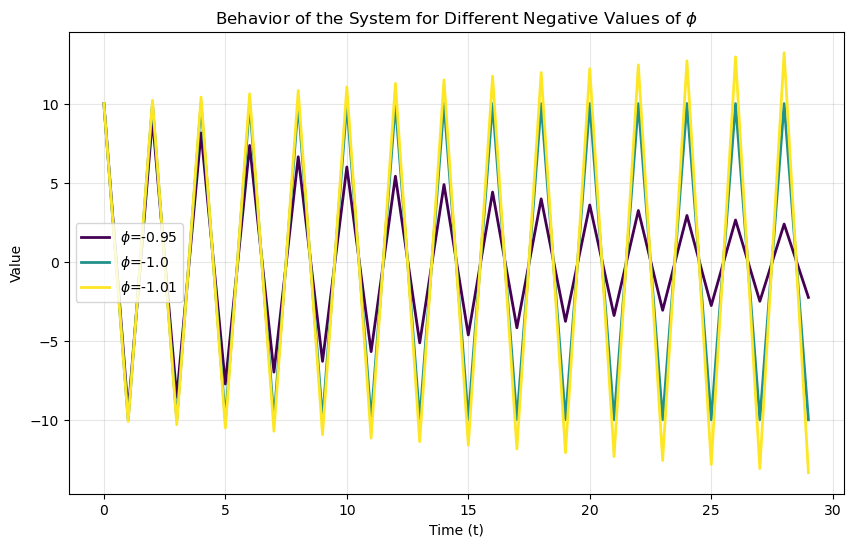

In [36]:
#| label: fig-diff-eq-homogeneous-behavior-negative
#| fig-cap: "Behavior of the homogeneous system for different negative values of $\\phi$"

# Plot the results with continuous color scale

plt.figure(figsize=(10, 6))
# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(phi_neg)))
for i in range(len(phi_neg)):
    plt.plot(t_neg, x_neg[i], label=fr"$\phi$={phi_neg[i]}", color=colors[i], linewidth=2)

plt.title(r"Behavior of the System for Different Negative Values of $\phi$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

From @fig-diff-eq-homogeneous-behavior-negative you can see that $\phi = -1$ is also a quite special boundary case.
Because taking an even power (e.g. $(-1)^2 = 1$) of a negative number gives a positive result and taking an odd power (e.g. $(-1)^3 = (-1)\times (-1) \times (-1) = -1 $) of a negative number gives a negative result,
the value of your bank account will flip from $x_0$ in even months to $-x_0$ in odd months.

Again, for values of $\phi$ that are slightly smaller than -1 (for example $\phi = -1.01$) the value of your bank account will oscillate between positive and negative values and diverge (it will go to plus or minus infinity as $t$ goes to infinity).

Only for $0 < \phi < -1$ does the value go to zero as $t$ goes to infinity (again, in an oscillating manner).

$$
\lim_{t \to \infty} x_t = \lim_{t \to \infty} \phi^t x_0 = 0 \quad \text{for any } -1 < \phi < 0
$$


We can also pose a related question. What happens with the system if we change the initial value $x_0$? In other words
we can ask: what is the effect of a small change in the initial value $x_0$ after a long time (as $t$ goes to infinity)?

Again, the answer depends on the value of $\phi$. Let's compare three scenarios: $\phi = 0.9$, $\phi = 1$, and $\phi = 1.1$.
In each case we will compare the trajectories of the system for two different initial values $x_0 = 100$ and $x_0 = 105$.

First let's do this on paper for the first case:

$$
\begin{align*}
x_t^{*} = \phi^t (x_0 + 5) = \phi^t x_0 + 5 \phi^t = x_t + 5 \phi^t \\
\end{align*}
$$

So the difference between the two trajectories is

$$
x_t^{*} - x_t = 5 \phi^t
$$

It is easy to see from this expression that for $\phi = 0.9$ the difference goes to zero as $t$ time goes to infinity (the two trajectories converge to each other).
However, for $\phi = 1$ the difference stays constant at 5 (it never disappears). For $\phi = 1.1$ the difference diverges (it gets larger and larger without bound as $t$ goes to infinity).

You can also answer this question by taking the derivative of $x_t$ with respect to $x_0$:

$$
\frac{\partial x_t}{\partial x_0} = \phi^t
$$


## The Non-Homogeneous Equation

As a next step we added deposits and withdrawals to the model, which we denoted by $e_t$ and assumed that the follow a uniform distribution between -5 and 5 but did not try to solve the equation:

$$
x_{t} = (1 + 0.02) x_{t - 1} + e_t
$$

The difference with the homogeneous equation is the presence of the $e_t$ term.

Our goal for today is to study the behavior (how does the value change over time) of systems described by first order linear difference equations.
First we want to write the equation in a more general form, so we will replace the 1.02 with a parameter $\phi$.

$$
x_{t} = \phi x_{t - 1} + e_t
$$

It will help if we can again solve the equation, that is express $x_t$ as a function of $x_0$, $\phi$, $e_t$ and $t$.
Luckily we can use the same approach as before.

It helps if we write the equation for a couple of periods.

$$
\begin{align}
t & \quad y_t \\
1 & \quad y_1 = \phi y_{0} + e_{1} \\
2 & \quad y_2 = \phi y_{1} + e_{2} \\
3 & \quad y_3 = \phi y_{2} + e_{3} \\
& \vdots \\
t & \quad y_{t} = \phi y_{t - 1} + e_{t} \\
t + 1 &  \quad y_{t + 1} = \phi y_{t} + e_{t + 1}\\
t + 2 & \quad y_{t + 2} = \phi y_{t + 1} + e_{t + 2}
\end{align}
$$

Try substituting the first equation into the second, then the second into the third equation.


::: {.callout-note collapse="true"}
## Click here to see the solution

$$
y_3 = \phi^3 y_0 + \phi^2 e_{1} + \phi e_{2} + \phi^0e_{3}
$$
:::

After that try writing the equation for $y_{t + 1}$ and substituting $y_t$ into it, then substituting $y_{t + 1}$ into the equation for $y_{t + 2}$.
and so forth until you see a pattern. After that generalize the result for $y_{t + j}$.



$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \phi^{j}e_{t} + \phi^{j - 1} e_{t + 1} + \ldots \phi^1 e_{t + j - 1} + \phi^0 e_{t + j}
$$
We can write this more compactly as:

$$
y_{t + j} = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} e_{t + j - k}
$$

You should check that the above formula is correct. Let's write it down for 
$j = 2$.

::: {.callout-note collapse="true"}
## Click here to see the result

$$
\begin{align}
y_{t + 2} = \phi^{2 + 1}y_{t - 1} & + \phi^0 e_{t + 2 - 0} \\
& + \phi^{1} e_{t + 2 - 1} \\
& + \phi^{2} e_{t + 2 - 2} \\
\end{align}
$$

Now we follow exactly the same logic as before and ask: 

1. What will happen to the value of $y_{t + j}$ as $j$ goes to infinity if we change one of the $e_t$ terms by a small amount?
2. What will happen to the value of $y_{t + j}$ as $j$ goes to infinity if we change all of the $e_t$ terms by a small amount?

As was the case with the initial condition in the homogeneous equation, the answer depends on the value of $\phi$.

The derivative of $y_{t + j}$ with respect to $e_t$ is:

$$
\frac{\partial y_{t + j}}{\partial e_t} = \phi^{j}
$$

So a tiny change in $e_t$ will change $y_{t + j}$ by $\phi^j$ times that tiny change. But we already known what happens to $\phi^j$ as $j$ goes to infinity from our analysis of the homogeneous equation.

- If $|\phi| < 1$ then $\phi^j$ goes to zero as $j$ goes to infinity. So a tiny change in $e_t$ will have no effect on $y_{t + j}$ for large $j$ (meaning after enough time has passed).
- If $|\phi| = 1$ then $\phi^j$ stays constant (meaning the effect of the change in $e_t$ will persist over time).
- If $|\phi| > 1$ then $\phi^j$ diverges (meaning the effect of the change in $e_t$ will get larger and larger over time without bound).


In [88]:
np.random.seed(41232)

t = np.arange(100)
x_0 = 10

phi = 0.5
e = np.random.uniform(-5, 5, size=len(t))

x = np.zeros((2, len(t)))

for i in range(len(t)):
    if i == 0:
        x[0, i] = x_0 + e[i]
        x[1, i] = x_0 + e[i] + 10
    else:
        x[0, i] = phi * x[0, i - 1] + e[i]
        x[1, i] = phi * x[1, i - 1] + e[i]

x

array([[ 1.36325418e+01,  5.25923045e+00,  5.63660368e+00,
         7.50304807e-01,  2.10698614e+00,  5.98083035e+00,
        -5.31245620e-01, -1.42435677e+00, -3.21723037e+00,
         1.57197646e+00,  8.23479999e-01, -2.47959768e+00,
         3.25796902e+00,  6.38937275e+00,  4.87199650e+00,
         4.35537791e-01,  3.77906909e+00,  2.83068716e-01,
        -2.66969516e-01,  4.14984601e+00,  1.71680872e+00,
         2.55901216e+00,  1.60141609e+00,  5.24205660e+00,
         6.57745184e+00,  7.83870833e-01, -5.12622177e-01,
         7.23195417e-01, -3.28262593e-01, -3.17374273e+00,
        -4.22982237e+00,  1.83182897e+00, -3.02980132e+00,
        -2.56872119e+00,  3.40411062e+00,  3.46438800e+00,
        -1.61075547e+00, -1.18696277e+00,  1.12644717e+00,
         8.82118223e-01, -5.99537024e-01,  3.08356991e+00,
        -2.48825924e+00, -1.25994964e+00,  2.50015526e+00,
         4.08294961e+00,  6.53456297e+00,  4.43640354e+00,
        -5.77657148e-01,  2.41399433e+00,  9.39633012e-0

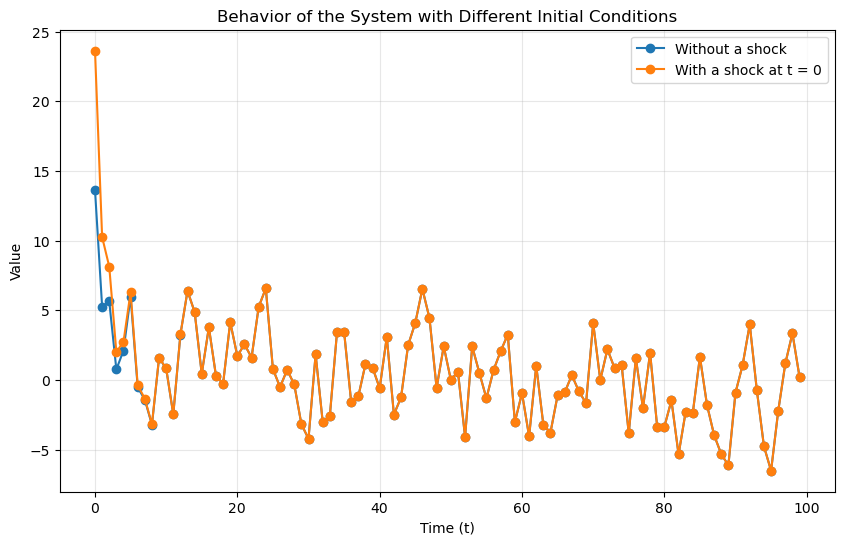

In [89]:
# Plot the two rows of x

plt.figure(figsize=(10, 6))
plt.plot(t, x[0], label="Without a shock", marker="o")
plt.plot(t, x[1], label="With a shock at t = 0", marker="o")
plt.title(r"Behavior of the System with Different Initial Conditions")
plt.xlabel(r"Time (t)")
plt.ylabel(r"Value")
plt.legend()
plt.grid(alpha=0.3)

In [90]:
x[1] - x[0]

array([1.00000000e+01, 5.00000000e+00, 2.50000000e+00, 1.25000000e+00,
       6.25000000e-01, 3.12500000e-01, 1.56250000e-01, 7.81250000e-02,
       3.90625000e-02, 1.95312500e-02, 9.76562500e-03, 4.88281250e-03,
       2.44140625e-03, 1.22070312e-03, 6.10351562e-04, 3.05175781e-04,
       1.52587891e-04, 7.62939453e-05, 3.81469727e-05, 1.90734863e-05,
       9.53674316e-06, 4.76837158e-06, 2.38418579e-06, 1.19209290e-06,
       5.96046448e-07, 2.98023224e-07, 1.49011612e-07, 7.45058060e-08,
       3.72529030e-08, 1.86264515e-08, 9.31322575e-09, 4.65661287e-09,
       2.32830644e-09, 1.16415322e-09, 5.82076609e-10, 2.91038305e-10,
       1.45519152e-10, 7.27595761e-11, 3.63797881e-11, 1.81898940e-11,
       9.09494702e-12, 4.54747351e-12, 2.27373675e-12, 1.13686838e-12,
       5.68434189e-13, 2.84217094e-13, 1.42108547e-13, 7.10542736e-14,
       3.55271368e-14, 1.77635684e-14, 8.88178420e-15, 4.44089210e-15,
       2.66453526e-15, 1.33226763e-15, 6.66133815e-16, 2.22044605e-16,
      

Now let's take a look at the effect of changing all of the $e_t$ terms by some amount (for example by adding 10 to each of them).

$$
\begin{align*}
y_{t + j}^{*} & = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} (e_{t + j - k} + 10) \\
              & = \phi^{j + 1} y_{t - 1} + \sum_{k = 0}^{j} \phi^{k} e_{t + j - k} + \sum_{k = 0}^{j} 10 \phi^{k} \\
              & = y_{t + j} + 10 \sum_{k = 0}^{j} \phi^{k} \\
\end{align*}
$$

Now the answer boils down to what happens to the sum $\sum_{k = 0}^{j} \phi^{k}$ as $j$ goes to infinity. By the way, you already known this series from basic algebra. It is a geometric series.

:::{#thm-geometric-series}
## Convergence of a Geometric Series

$$
S_{n} = 1 + \phi + \phi^2 + \phi^3 + \ldots + \phi^n
$$

Assuming that $\phi \neq 1$, this series can be expressed more compactly as 

$$
S_{n} = \frac{1 - \phi^{n + 1}}{1 - \phi}
$$

To see this, compute the difference between $S_n$ and $\phi S_n$ and rearrange.

If $|\phi| < 1 \iff -1 < \phi < 1$ the series has a limit for $n \to \infty$:

$$
\lim_{n \to \infty} S_{n} = \frac{1}{1 - \phi}
$$
:::

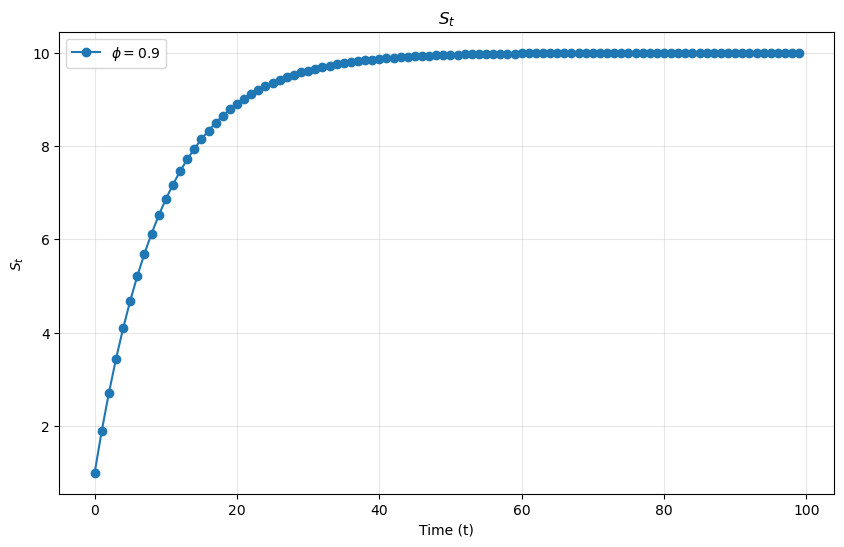

In [100]:
# Let us check it with code

t = np.arange(100)
phi = 0.9

S_t = np.cumsum(phi**t)

plt.figure(figsize=(10, 6))
plt.plot(t, S_t, label=rf"$\phi = {phi}$", marker="o")
plt.title(r"$S_t$")
plt.xlabel(r"Time (t)")
plt.ylabel(r"$S_t$")
plt.legend()
plt.grid(alpha=0.3)

## Second Order Linear Difference Equations

Until now we have only looked at a simple equation where the value of a variable at time $t$ depends only on its value at time $t - 1$. But what will happen if the value
of the variable at time $t$ not only depends on its value during the previous period but also on value of the period before that (at time $t - 2$)? In this case our
equation of motion will look like this:

$$
x_t = \phi_1 x_{t - 1} + \phi_2 x_{t - 2} + e_t
$$

How can we solve this equation? It turns out that there is an elegant approach
because we can represent the second order equation of a system of vector equations of first order.

$$
\begin{align*}
x_t & = \phi_1 x_{t - 1} + \phi_2 x_{t - 2} + e_t \\
x_{t - 1} & = x_{t - 1}\\
\end{align*}
$$

At a first glance we have not done anything useful. But the usefulness of this approach becomes apparent if we write the two equations above in matrix form.

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}

\phi_1 & \phi_2 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
+
\begin{pmatrix}
e_t \\
0
\end{pmatrix}
$$

Note that we have not done anything special, we have just rewritten the same equation in a different form.

Now we can begin thinking how to reduce this problem to the one that we already know how to solve (which is the first order case).
If we could somehow transform the equations so that we have only $x_t$ and $x_{t - 1}$ in one of the equations and 
$x_{t - 1}$ and $x_{t - 2}$ in the other equation then we would be done, because we would have two equations
of the form that we already know how to solve.

Let's see this in action with a numerical example.

With $\phi_1 = 0.5$ and $\phi_2 = 0.1$ the system of equations is:

$$
\begin{pmatrix}
x_t \\
x_{t - 1}
\end{pmatrix}
=
\begin{pmatrix}
0.5 & 0.1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
x_{t - 1} \\
x_{t - 2}
\end{pmatrix}
+
\begin{pmatrix}
e_t \\
0
\end{pmatrix}
$$

In [131]:
phi_1 = 0.4
phi_2 = 0.5

evals, evecs = np.linalg.eig(np.array([[phi_1, phi_2], [1, 0]]))

print(evals)
print(np.linalg.inv(evecs))

Phi = np.array([[phi_1, phi_2], [1, 0]])
np.linalg.inv(evecs) @ Phi @ evecs


[ 0.93484692 -0.53484692]
[[ 0.93143129  0.49817316]
 [-0.77162084  0.72134737]]


array([[ 9.34846923e-01, -1.11022302e-16],
       [ 1.11022302e-16, -5.34846923e-01]])